# land mark 찍기

In [1]:
import face_recognition
import dlib
import matplotlib.pyplot as plt
import cv2
import os
import shutil
import openface

In [6]:
def convert_color(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

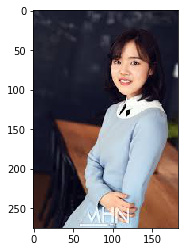

In [7]:
image_path = ('./test_images/kim1.jpg')
image = cv2.imread(image_path)
plt.imshow(convert_color(image))

## face recognition 통한 land mark 찍기
- 72개찍어줌
- 얼굴 영역을 인자값으로 안줘도 됨

In [624]:
image_path = ('./test_images/kim1.jpg')
image = cv2.imread(image_path)

face_landmarks_len : 72


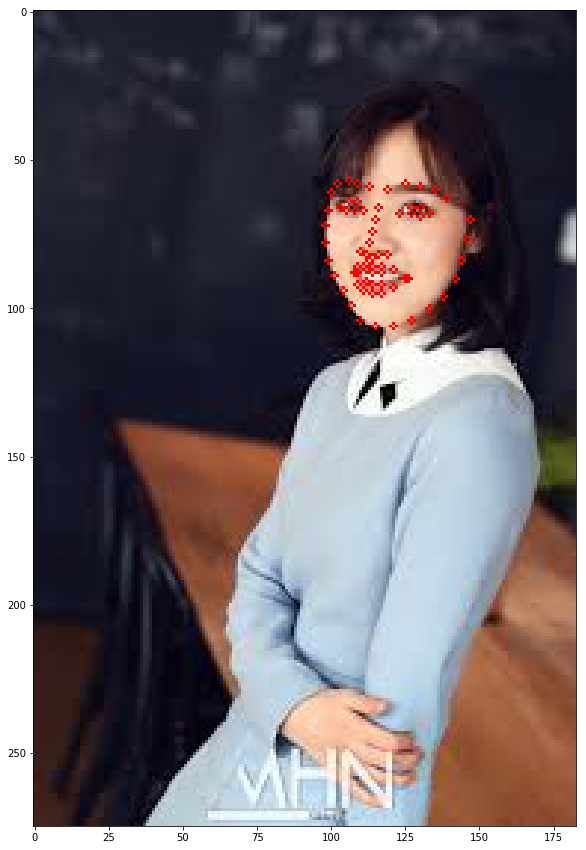

In [625]:
face_landmarks = face_recognition.face_landmarks(image)[0]
face_landmarks_len = 0
for k in face_landmarks.keys():
    face_landmarks_len += len(face_landmarks[k])
    for x,y in face_landmarks[k]:
        cv2.circle(image, (x,y), 1, (0, 0, 255), 1)
print("face_landmarks_len : {}".format(face_landmarks_len))
plt.figure(figsize=(15,15))
plt.imshow(convert_color(image))


## dlib predictor model 통해서 찍기
- 68개 찍음
- 얼굴 영역도 줘야함

In [72]:
image_path = ('./test_images/kim1.jpg')
image = cv2.imread(image_path)

len(land_mark) : 68


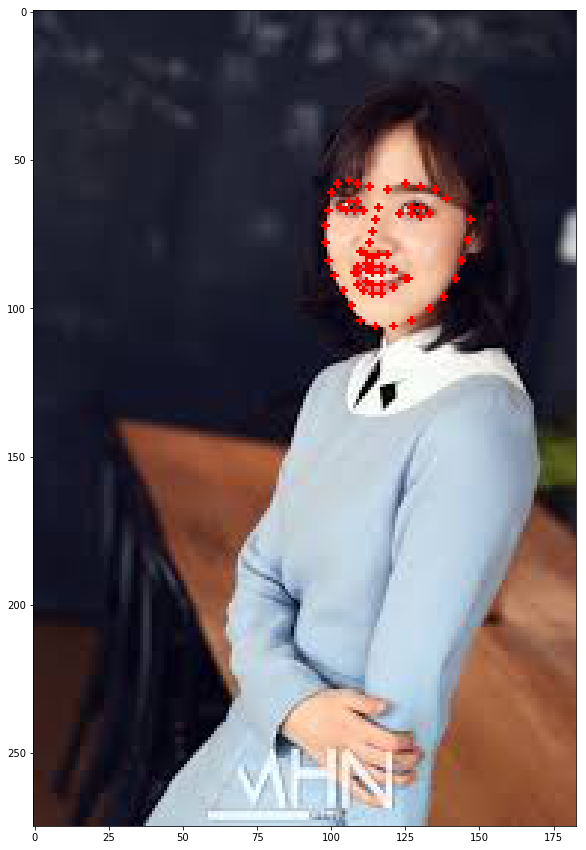

In [73]:
predictor_model = "./shape_predictor_68_face_landmarks.dat"
face_detector = dlib.get_frontal_face_detector()
# land mark 검출
face_pose_predictor = dlib.shape_predictor(predictor_model)
# face rect
detected_face = face_detector(image, 1)

for face_rect in detected_face:
    pose_landmarks = face_pose_predictor(image, face_rect) 
    print("len(land_mark) : {}".format(len(pose_landmarks.parts())))
    for pos in pose_landmarks.parts():
        cv2.circle(image, (pos.x,pos.y), 1, (0, 0, 255), -1)
    # BGR을 RGB로 바꿔줌 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 96*96 resize
    #reduction_img = cv2.resize(reduction_img, (96,96))
plt.figure(figsize=(15,15))  
plt.imshow(image)    

# Face recogniton 통해 eye center 구하기


In [95]:
import numpy as np

In [79]:
image_path = ('./test_images/kim1.jpg')
image = cv2.imread(image_path)

[106.66666667  65.83333333] [128.16666667  67.33333333]


<Figure size 1080x1080 with 0 Axes>

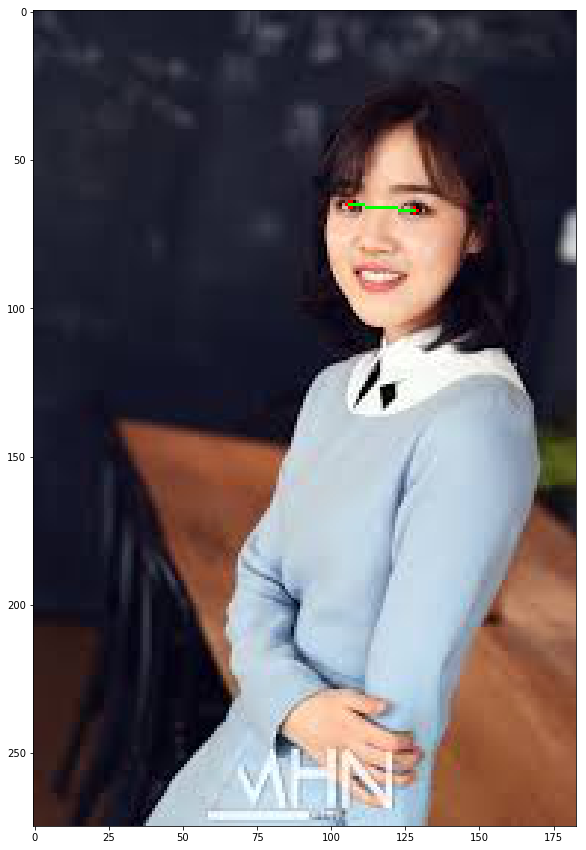

In [131]:
face_landmarks = face_recognition.face_landmarks(image)[0]
left_eye_center = np.array(face_landmarks['left_eye']).mean(axis = 0)
right_eye_center = np.array(face_landmarks['right_eye']).mean(axis = 0)
print(left_eye_center, right_eye_center)

plt.figure(figsize=(15,15))
lec_x = int(left_eye_center[0])
lec_y = int(left_eye_center[1])
rec_x = int(right_eye_center[0])
rec_y = int(right_eye_center[1])
cv2.circle(image, (lec_x, lec_y), 1, (0,0,255), 1)
cv2.circle(image, (rec_x, rec_y), 1, (0,0,255), 1)
cv2.line(image, (lec_x, lec_y), (rec_x, rec_y), (0,255,0), 1)
plt.figure(figsize=(15,15))
plt.imshow(convert_color(image))

In [539]:
(lec_y-rec_y)/(lec_x-rec_x)

0.09090909090909091

In [540]:
import math
angle = math.atan(lec_y - rec_y ) / (lec_x - rec_x )

In [541]:
angle

0.0503249417179132

In [ ]:
for k in face_landmarks.keys():
    face_landmarks_len += len(face_landmarks[k])
    for x,y in face_landmarks[k]:
        cv2.circle(image, (x,y), 1, (0, 0, 255), 1)
print("face_landmarks_len : {}".format(face_landmarks_len))
plt.figure(figsize=(15,15))
plt.imshow(convert_color(image))


In [16]:
left_eye = face_recognition.face_landmarks(image)[0]['left_eye']
for e in left_eye:
    


[(103, 66), (106, 64), (109, 64), (111, 67), (108, 67), (105, 67)]

In [135]:
image = cv2.imread(image_path)
face_locations = face_recognition.face_locations(image)
# 그 영역 통해 embedding된 값
#face_encdoings = face_recognition.face_encodings(image, face_locations)
face_rect = face_locations[0]

In [165]:
face_locations

[(49, 141, 101, 89)]

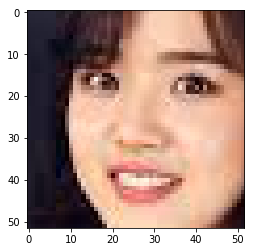

In [139]:
plt.imshow(convert_color(image[face_rect[0]:face_rect[2], face_rect[3]:face_rect[1]]))

## 얼굴 저장

In [144]:
save_img = image[face_rect[0]:face_rect[2], face_rect[3]:face_rect[1]]

In [145]:
cv2.imwrite('./test_face.jpg', save_img)

True

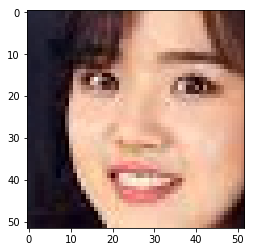

In [156]:
test_img = cv2.imread('./test_face.jpg')
plt.imshow(convert_color(test_img))

# image embedding test case
- 얼굴 이미지를 어떻게 써서 비교할건지
- 비교하는 원본이미지 임베딩과 비교되는 DB이미지 임베딩의 값을 아래 Test case로 선택 가능

##  얼굴 자체를 도려내고 그 얼굴로 embedding - Test1

### Test 1-1
- 그냥 face_recognition의 face_location으로 도려냄
    - 얼굴 인식 모델을 주지않으면 default로 dlib의 HOG을 통해 학습시킨 모델로 얼굴 인식

### Test 1-2
- landmark, face_rect를 모두 포함하는 최적의 얼굴을 도려냄
    - 직접 로직을 통해 구현

## 그냥 얼굴이 포함된 이미지로 embedding - Test2
- 그냥 face_recogniton의 face_encodings으로 embedding을 뽑음
    - 내부적으로는 결국 Test 1-2과 유사


## Test 2(얼굴이 포함된 이미지)

[(49, 141, 101, 89)]


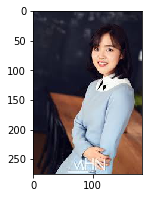

In [268]:
image = cv2.imread(image_path)
plt.figure(figsize=(3,3))
plt.imshow(convert_color(image))
# 얼굴 영역 찾고
face_locations = face_recognition.face_locations(image)
print(face_locations)
# 그 영역 통해 embedding된 값
face_encdoings1 = face_recognition.face_encodings(image, face_locations)

### 얼굴 영역 안주면 face_location을 HOG알고리즘으로 학습된 모델을 통해 얼굴 영역 찾음

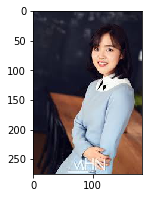

In [269]:
image = cv2.imread(image_path)
plt.figure(figsize=(3,3))
plt.imshow(convert_color(image))
# 그 영역 통해 embedding된 값
face_encdoings2 = face_recognition.face_encodings(image)

__두 비교 군은 차이가 없음__

In [271]:
diff = face_recognition.face_distance(face_encdoings1, face_encdoings2[0])
print(diff)

[0.]


## TEST 1-1(얼굴만 잘라낸 이미지)

In [263]:
image = cv2.imread('./test_face.jpg')
crop_land = [(0, image.shape[1], image.shape[0], 0)]
face_encdoings3 = face_recognition.face_encodings(image, crop_land)

In [264]:
crop_land = crop_land[0]

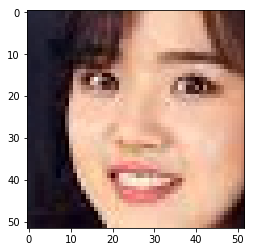

In [265]:
plt.imshow(convert_color(image[crop_land[0]:crop_land[2], crop_land[3]:crop_land[1]]))

### 얼굴만 잘라낸 이미지 - 얼굴 영역 안 줄 때
- 마찬가지로 HOG알고리즘으로 학습된 모델로 얼굴을 찾음

In [266]:
image = cv2.imread('./test_face.jpg')
face_encdoings4 = face_recognition.face_encodings(image)

In [267]:
diff = face_recognition.face_distance(face_encdoings3, face_encdoings4[0])
print(diff)

[0.07238564]


In [871]:
# ebedding 비교
# 같은 잘라내기인데 embedding 값이 다름
# default로 수행되는 dlib HOG 얼굴인식은 같을텐데 
# 작은 얼굴이미지에대한 얼굴인식 추출에 다른 연산이 있을 것이라 추정
print(face_recognition.face_distance(face_encdoings1, face_encdoings3[0]))
print(face_recognition.face_distance(face_encdoings1, face_encdoings4[0]))

[0.1889717]
[0.1980661]


## TEST 1-2
- 제일 인식률이 좋을 것으로 예상됨
- 얼굴을 도려내는데 land makr와 face_rect를 모두 고려해서 최적의 온전한 얼굴을 뽑음
- 회전되어 있는 얼굴은 눈 사이의 포인트로 구해진 각도로 회전시켜줌

### 중심점을 기준으로 회전시키도록함

[107.          65.83333333] [128.33333333  67.5       ]
107 65 128 67
-354.5596679689945


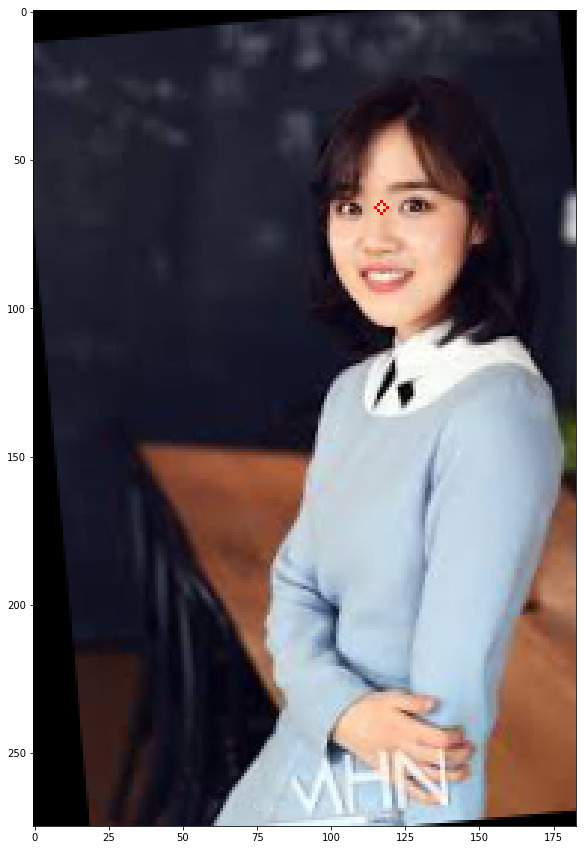

In [654]:
image = cv2.imread('./test_images/kim1.jpg')

face_landmarks = face_recognition.face_landmarks(image)[0]
eft_eye_center = np.array(face_landmarks['left_eye']).mean(axis = 0)
right_eye_center = np.array(face_landmarks['right_eye']).mean(axis = 0)
print(left_eye_center, right_eye_center)
lec_x = int(left_eye_center[0])
lec_y = int(left_eye_center[1])
rec_x = int(right_eye_center[0])
rec_y = int(right_eye_center[1])
print(lec_x, lec_y, rec_x, rec_y)

angle = np.degrees(np.arctan2((lec_y-rec_y), (lec_x-rec_x))) - 180
print(angle)
center_rotate = [int((lec_x + rec_x)/2), int((lec_y + rec_y)/2)]
# 회전 중심
M = cv2.getRotationMatrix2D((center_rotate[0], center_rotate[1]), angle, 1)
image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
image = cv2.circle(image, (center_rotate[0], center_rotate[1]), 2, (0, 0, 255), 1)
image = convert_color(image)
plt.figure(figsize=(15,15))
plt.imshow(image)


### 함수설명
- crop_rotate(img_path)
    - 이미지에서 랜드마크 구하고 각 얼굴에 대한 회전시키기위한 중심점을 구함
    - 각 이미지에대해 crop_image method를 호출해 수행
    - crop_image 수행 후 이미지는 list형태로 리턴
- distacne_two_point(list_point1, list_point2)
- crop_image(image, center_rotate, M)
    - 각 얼굴에대해 회전 중심점을 받고
    - 그 회전 중심점과 회전된 사진에서 나오게되는 얼굴에 대한 눈사이 중심점 사이의 거리를 구함
        - distance_two_point
    - 가장 그 거리가 가까운 지점을 기준으로 얼굴의 land mark와 face_rect를 고려해 도려냄

In [872]:
# 회전 포인트 찾아서 회전, 얼굴 안잘리게
def crop_rotate(img_path):
    image = cv2.imread(img_path)
    face_landmarks = face_recognition.face_landmarks(image)
    
    image_list = []
    # 각 얼굴들 검출해서 회전시킬 중심점들을 찾아서 (몇번째 얼굴, 회전 중심)의 dict형태로 추가
    for landmarks in face_landmarks:
        left_eye_center = np.array(landmarks['left_eye']).mean(axis = 0)
        right_eye_center = np.array(landmarks['right_eye']).mean(axis = 0)
        # 눈 중앙 좌표
        lec_x = int(left_eye_center[0])
        lec_y = int(left_eye_center[1])
        rec_x = int(right_eye_center[0])
        rec_y = int(right_eye_center[1])
        # 두 점을 통해 각을 구함
        angle = np.degrees(np.arctan2((lec_y-rec_y), (lec_x-rec_x))) - 180
        print("left_eye_center : {} right_eye_center : {}".format((lec_x, lec_y),(rec_x, rec_y)))
        print("angle : {}".format(angle))
        # 회전 중심 점
        center_rotate = [int((lec_x + rec_x)/2), int((lec_y + rec_y)/2)]
        M = cv2.getRotationMatrix2D((center_rotate[0], center_rotate[1]), angle, 1)
        image_list.append(crop_image(image, center_rotate, M))
        
    return image_list
# 유클리디안 거리
def distacne_two_point(list_point1, list_point2):
    dx = list_point1[0] - list_point2[0]
    dy = list_point1[1] - list_point2[1]
    # 굳이 소수점까지 볼 필요는 없음
    return int((dx**2 + dy**2)**0.5)
    
def crop_image(image, center_rotate, M):
    rotate_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    face_landmarks = face_recognition.face_landmarks(rotate_image)
    distance_list = []
    
    print("crop image~")
    for landmark in face_landmarks:
        left_eye_center = np.array(landmark['left_eye']).mean(axis=0)
        right_eye_center = np.array(landmark['right_eye']).mean(axis=0)
        eye_center = ((left_eye_center+right_eye_center)/2).astype('uint32')
        # 회전된 이미지의 축은 이전 함수에서 해당하는 얼굴의 중심점이란걸 알 수 있다
        # 이 점과 그리고 현재 회전된 이미지에서의 landmark의 중심점 사이의 거리가 가장 짧은 얼굴이
        # 해당하는 얼굴이니 이 얼굴을 도려내야함
        print("center_rotate : {} , eye_center : {}".format(center_rotate, eye_center))
        distance_list.append(distacne_two_point(eye_center, center_rotate))
    
    # distance가 가장 짧은 index를 가지고 옴 
    for i,d in enumerate(distance_list):
        if d == min(distance_list):
            crop_image_index = i
    print("distance_list : {}".format(distance_list))
    print("crop_image_index : {}".format(crop_image_index))
    print("len(face_landmarks) : {}".format(len(face_landmarks)))
    current_face_mark = face_landmarks[crop_image_index]
    
    landmarks_list = []
    for k in current_face_mark.keys():
        landmarks_list.extend(current_face_mark[k]) 
    print(len(landmarks_list))
    landmarks_array = np.array(landmarks_list)
    rect_list = []
    # 얼굴 rect를 x,y좌표로 구분해놓고
    for array in np.split(np.array(face_recognition.face_locations(rotate_image)[crop_image_index]), 2):
        rect_list.append(array)
    # landmkar와 rect에 대한 x,y,좌표를 np.array로 만들어서 최소값 최대값을 쉽게 뽑도록 함
    for i in range(len(rect_list)):
        temp = rect_list[i][0]
        rect_list[i][0] = rect_list[i][1]
        rect_list[i][1] = temp
        landmarks_array = np.vstack((landmarks_array, rect_list[i].reshape((-1,2))))    
    min_xy = landmarks_array.min(axis=0)
    max_xy = landmarks_array.max(axis=0)
    
    return image[min_xy[1]:max_xy[1], min_xy[0]:max_xy[0]]

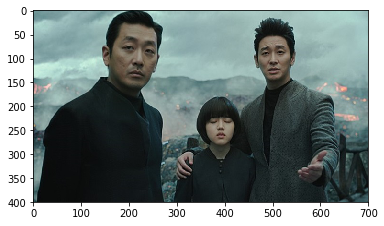

In [873]:
img = cv2.imread('./test_images/test1/test1.jpg')
plt.imshow(convert_color(img))

In [874]:
image = crop_rotate('./test_images/test1/test1.jpg')

left_eye_center : (200, 79) right_eye_center : (242, 86)
angle : -350.5376777919744
crop image~
center_rotate : [221, 82] , eye_center : [221  83]
center_rotate : [221, 82] , eye_center : [499  43]
center_rotate : [221, 82] , eye_center : [413 203]
distance_list : [1, 280, 226]
crop_image_index : 0
len(face_landmarks) : 3
72
left_eye_center : (486, 90) right_eye_center : (516, 88)
angle : -3.814074834290352
crop image~
center_rotate : [501, 89] , eye_center : [501  89]
center_rotate : [501, 89] , eye_center : [222  64]
center_rotate : [501, 89] , eye_center : [382 225]
distance_list : [0, 280, 180]
crop_image_index : 0
len(face_landmarks) : 3
72
left_eye_center : (377, 234) right_eye_center : (405, 233)
angle : -2.0454084888872046
crop image~
center_rotate : [391, 233] , eye_center : [506  93]
center_rotate : [391, 233] , eye_center : [226  77]
center_rotate : [391, 233] , eye_center : [391 233]
distance_list : [181, 227, 0]
crop_image_index : 2
len(face_landmarks) : 3
72


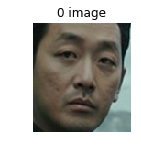

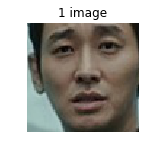

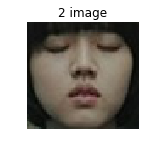

In [880]:
for i,img in enumerate(image):
    img_ = convert_color(img)
    
    fig, axes = plt.subplots(1, 1, figsize=(2,2))
    plt.title("{} image".format(i))
    axes.imshow(img_, 'gray')
    axes.axis('off')

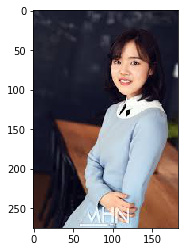

In [884]:
img = cv2.imread('./test_images/kim1.jpg')
plt.imshow(convert_color(img))

In [885]:
image = crop_rotate('./test_images/kim1.jpg')

left_eye_center : (107, 65) right_eye_center : (128, 67)
angle : -354.5596679689945
crop image~
center_rotate : [117, 66] , eye_center : [117  66]
distance_list : [0]
crop_image_index : 0
len(face_landmarks) : 1
72


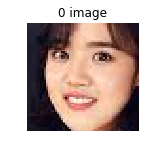

In [886]:
for i,img in enumerate(image):
    img_ = convert_color(img)
    
    fig, axes = plt.subplots(1, 1, figsize=(2,2))
    plt.title("{} image".format(i))
    axes.imshow(img_, 'gray')
    axes.axis('off')

# Testing

In [946]:
# testing 하는 function
def get_embedding(image_path):
    image = crop_rotate(image_path)
    for img in image:
        img_size = [(0, img.shape[1], img.shape[0], 0)]
        face_encoding = face_recognition.face_encodings(img, img_size)
    return face_encoding

def test_embedding():
    img_path = './test_images/test1/'
    # setup 성공한 이미지 / 전체 이미지
    totla_image = len(os.listdir(img_path))
    count = 0
    not_face = []
    face_database = {}
    
    # ./test_images/test1/ 내의 모든 파일
    for p in os.listdir(img_path):
        identity = str.split(p, '.')[0]
        print("file {} embedding...".format(p))

        img_ = os.path.join(img_path, p)
        face_encdoings = []
        images = crop_rotate(img_)
        print("len(images) : {}".format(len(images)))
        for img in images:
            img_size = [(0, img.shape[1], img.shape[0], 0)]
            face_encoding = face_recognition.face_encodings(img, img_size)
            face_encdoings.append(face_encoding)
        if face_encdoings == 0:
            not_face.append(p)
            continue
        elif len(face_encdoings) == 1:
            face_database[identity] = face_encdoings[0]
        else:
            face_database[identity] = [e for e in face_encdoings]

        count += 1
        print("{} / {}".format(count, totla_image))
    print("얼굴을 못 읽는 이미지 : {}".format(not_face))
    return face_database

def test_db_compare(origin_embedding, db_embedding):
    diff_list = []
    for k in db_embedding.keys():
        embedding_array = db_embedding[k]
        if len(embedding_array) > 1:
            for e in embedding_array:
                vector_diff = face_recognition.face_distance(origin_embedding,e)
                print("{}파일 : {}".format(k, vector_diff))
                diff_list.append(vector_diff)
            
        else:
            vector_diff = face_recognition.face_distance(origin_embedding,embedding_array)
            print("{}파일 : {}".format(k, vector_diff))
            diff_list.append(vector_diff)

In [949]:
# testing 하는 function
def get_embedding2(image_path, crop_bool = False):
    image = cv2.imread(image_path)
    face_locations = face_recognition.face_locations(image)
    if crop_bool:
        for face_rect in face_locations:
            crop_image = image[face_rect[0]:face_rect[2], face_rect[3]:face_rect[1]]
            face_encodings = face_recognition.face_encodings(crop_image)
    else:
        face_encodings = face_recognition.face_encodings(image, face_locations)
    return face_encodings
    
# 얼굴이 포함된 이미지, 얼굴을 뽑았지만 랜드마크가 잘린 얼굴 이미지
def test_embedding2(crop_bool = False):
    img_path = './test_images/test1/'
    # setup 성공한 이미지 / 전체 이미지
    totla_image = len(os.listdir(img_path))
    count = 0
    not_face = []
    face_database = {}
    # ./test_images/test1/ 내의 모든 파일
    for p in os.listdir(img_path):
        identity = str.split(p, '.')[0]
        print("file {} embedding...".format(p))

        img_ = os.path.join(img_path, p)
        print(img_)
        image = cv2.imread(img_)
        face_locations = face_recognition.face_locations(image)
        if crop_bool:
            encoding_list = []
            for face_rect in face_locations:
                crop_image = image[face_rect[0]:face_rect[2], face_rect[3]:face_rect[1]]
                face_encdoings = face_recognition.face_encodings(crop_image)
                encoding_list.append(face_encdoings[0])
            face_database[identity] = encoding_list
            continue

        face_encdoings = face_recognition.face_encodings(image, face_locations)

        if face_encdoings == 0:
            not_face.append(p)
            continue
        elif len(face_encdoings) == 1:
            face_database[identity] = face_encdoings[0]
        else:
            face_database[identity] = [e for e in face_encdoings]

        count += 1
        print("{} / {}".format(count, totla_image))        

    print("얼굴을 못 읽는 이미지 : {}".format(not_face))
    return face_database
# 
def test_db_compare2(origin_embedding, db_embedding):
    diff_list = []
    for k in db_embedding.keys():
        embedding_array = db_embedding[k]
        if type(embedding_array) is list:
            for e in embedding_array:
                vector_diff = face_recognition.face_distance(origin_embedding,e)
                print("{}파일 : {}".format(k, vector_diff))
                diff_list.append(vector_diff)
        else:
            vector_diff = face_recognition.face_distance(origin_embedding,embedding_array)
            print("{}파일 : {}".format(k, vector_diff))
            diff_list.append(vector_diff)

## original image embedding | db image embedding
- ori_face_emb1 : 원본얼굴 - 얼굴만 있는 이미지(face_location으로 추출)에서 embedding
- ori_face_emb2 : 원본얼굴 - 얼굴 포함된 이미지에서 embedding
- ori_face_emb3 : 원본얼굴 - 얼굴만 있는 이미지(랜드마크,face_rect보존하고 회전) embedding
- db_image_emb1 : 원본얼굴 - 얼굴만 있는 이미지(face_location으로 추출)에서 embedding
- db_image_emb2 : 원본얼굴 - 얼굴 포함된 이미지에서 embedding
- db_image_emb3 : 원본얼굴 - 얼굴만 있는 이미지(랜드마크,face_rect보존하고 회전) embedding

In [941]:
ori_face_emb1 = get_embedding2('./test_images/kim1.jpg',crop_bool=True)
ori_face_emb2 = get_embedding2('./test_images/kim1.jpg')
ori_face_emb3 = get_embedding('./test_images/kim1.jpg')

left_eye_center : (107, 65) right_eye_center : (128, 67)
angle : -354.5596679689945
crop image~
center_rotate : [117, 66] , eye_center : [117  66]
distance_list : [0]
crop_image_index : 0
len(face_landmarks) : 1
72


In [940]:
db_image_emb1 = test_embedding2(crop_bool=True)

file kim10.jpg embedding...
./test_images/test1/kim10.jpg
file kim2.jpg embedding...
./test_images/test1/kim2.jpg
file kim3.jpg embedding...
./test_images/test1/kim3.jpg
file kim4.jpg embedding...
./test_images/test1/kim4.jpg
file kim5.jpg embedding...
./test_images/test1/kim5.jpg
file kim6.jpg embedding...
./test_images/test1/kim6.jpg
file kim7.jpg embedding...
./test_images/test1/kim7.jpg
file kim8.jpg embedding...
./test_images/test1/kim8.jpg
file kim9.jpg embedding...
./test_images/test1/kim9.jpg
file test1.jpg embedding...
./test_images/test1/test1.jpg
얼굴을 못 읽는 이미지 : []


In [942]:
db_image_emb2 = test_embedding2()

file kim10.jpg embedding...
./test_images/test1/kim10.jpg
1 / 10
file kim2.jpg embedding...
./test_images/test1/kim2.jpg
2 / 10
file kim3.jpg embedding...
./test_images/test1/kim3.jpg
3 / 10
file kim4.jpg embedding...
./test_images/test1/kim4.jpg
4 / 10
file kim5.jpg embedding...
./test_images/test1/kim5.jpg
5 / 10
file kim6.jpg embedding...
./test_images/test1/kim6.jpg
6 / 10
file kim7.jpg embedding...
./test_images/test1/kim7.jpg
7 / 10
file kim8.jpg embedding...
./test_images/test1/kim8.jpg
8 / 10
file kim9.jpg embedding...
./test_images/test1/kim9.jpg
9 / 10
file test1.jpg embedding...
./test_images/test1/test1.jpg
10 / 10
얼굴을 못 읽는 이미지 : []


In [943]:
db_image_emb3 = test_embedding()

file kim10.jpg embedding...
left_eye_center : (80, 76) right_eye_center : (109, 74)
angle : -3.945186229037546
crop image~
center_rotate : [94, 75] , eye_center : [94 75]
distance_list : [0]
crop_image_index : 0
len(face_landmarks) : 1
72
len(images) : 1
1 / 10
file kim2.jpg embedding...
left_eye_center : (96, 65) right_eye_center : (123, 65)
angle : 0.0
crop image~
center_rotate : [109, 65] , eye_center : [109  65]
distance_list : [0]
crop_image_index : 0
len(face_landmarks) : 1
72
len(images) : 1
2 / 10
file kim3.jpg embedding...
left_eye_center : (170, 66) right_eye_center : (197, 62)
angle : -8.426969021480659
crop image~
center_rotate : [183, 64] , eye_center : [183  64]
distance_list : [0]
crop_image_index : 0
len(face_landmarks) : 1
72
len(images) : 1
3 / 10
file kim4.jpg embedding...
left_eye_center : (82, 81) right_eye_center : (112, 79)
angle : -3.814074834290352
crop image~
center_rotate : [97, 80] , eye_center : [97 80]
distance_list : [0]
crop_image_index : 0
len(face_land

In [947]:
test_db_compare2(ori_face_emb1, db_image_emb1)

kim10파일 : [0.280421]
kim2파일 : [0.42379427]
kim3파일 : [0.33521775]
kim4파일 : [0.33578935]
kim5파일 : [0.37153543]
kim6파일 : [0.39310741]
kim7파일 : [0.35626835]
kim8파일 : [0.58457297]
kim9파일 : [0.35001322]
test1파일 : [0.61471746]
test1파일 : [0.60641684]
test1파일 : [0.43149775]


In [950]:
test_db_compare2(ori_face_emb1, db_image_emb2)

kim10파일 : [0.33109133]
kim2파일 : [0.3786253]
kim3파일 : [0.3287355]
kim4파일 : [0.32982125]
kim5파일 : [0.36458918]
kim6파일 : [0.41205452]
kim7파일 : [0.34502218]
kim8파일 : [0.58307672]
kim9파일 : [0.39663004]
test1파일 : [0.6531954]
test1파일 : [0.57695522]
test1파일 : [0.41316279]


In [954]:
test_db_compare(ori_face_emb1[0], db_image_emb3)

kim10파일 : [0.3189343]
kim2파일 : [0.41144954]
kim3파일 : [0.3406057]
kim4파일 : [0.35051829]
kim5파일 : [0.37203737]
kim6파일 : [0.40852079]
kim7파일 : [0.36054722]
kim8파일 : [0.56779102]
kim9파일 : [0.38855601]
test1파일 : [0.6388119]
test1파일 : [0.61077015]
test1파일 : [0.43276102]


In [955]:
test_db_compare2(ori_face_emb2, db_image_emb1)

kim10파일 : [0.32169709]
kim2파일 : [0.47210352]
kim3파일 : [0.3696233]
kim4파일 : [0.36758273]
kim5파일 : [0.41931487]
kim6파일 : [0.44025953]
kim7파일 : [0.37459139]
kim8파일 : [0.61290331]
kim9파일 : [0.37683685]
test1파일 : [0.65251565]
test1파일 : [0.6539418]
test1파일 : [0.45352937]


In [956]:
test_db_compare2(ori_face_emb2, db_image_emb2)

kim10파일 : [0.33219474]
kim2파일 : [0.4222463]
kim3파일 : [0.36277107]
kim4파일 : [0.33682689]
kim5파일 : [0.39270078]
kim6파일 : [0.46461552]
kim7파일 : [0.36432057]
kim8파일 : [0.61194706]
kim9파일 : [0.4141078]
test1파일 : [0.68217133]
test1파일 : [0.62129296]
test1파일 : [0.41666448]


In [957]:
test_db_compare(ori_face_emb2[0], db_image_emb3)

kim10파일 : [0.31727892]
kim2파일 : [0.44479428]
kim3파일 : [0.37474494]
kim4파일 : [0.37040091]
kim5파일 : [0.40255134]
kim6파일 : [0.47769224]
kim7파일 : [0.38467451]
kim8파일 : [0.60121958]
kim9파일 : [0.41261629]
test1파일 : [0.67439038]
test1파일 : [0.65338276]
test1파일 : [0.44988959]


In [968]:
test_db_compare2(ori_face_emb3, db_image_emb1)

kim10파일 : [0.31143466]
kim2파일 : [0.45551423]
kim3파일 : [0.36007294]
kim4파일 : [0.36405256]
kim5파일 : [0.40145969]
kim6파일 : [0.42476928]
kim7파일 : [0.36162663]
kim8파일 : [0.59514697]
kim9파일 : [0.35997865]
test1파일 : [0.62302023]
test1파일 : [0.63381398]
test1파일 : [0.44129043]


In [967]:
test_db_compare2(ori_face_emb3, db_image_emb2)

kim10파일 : [0.33417809]
kim2파일 : [0.4013918]
kim3파일 : [0.35286415]
kim4파일 : [0.33864479]
kim5파일 : [0.38077328]
kim6파일 : [0.44623122]
kim7파일 : [0.34847181]
kim8파일 : [0.59302502]
kim9파일 : [0.39864466]
test1파일 : [0.65560851]
test1파일 : [0.60279341]
test1파일 : [0.41165143]


In [961]:
test_db_compare(ori_face_emb3[0], db_image_emb3)

kim10파일 : [0.32025192]
kim2파일 : [0.42895475]
kim3파일 : [0.37054766]
kim4파일 : [0.36672245]
kim5파일 : [0.38866]
kim6파일 : [0.45640694]
kim7파일 : [0.37228961]
kim8파일 : [0.58018187]
kim9파일 : [0.39376911]
test1파일 : [0.64793046]
test1파일 : [0.63515003]
test1파일 : [0.4401737]


## 결론
- original 이미지와 db의 이미지 모두 랜드마크 포함되게 얼굴을 뽑고 눈 사이 각도 통해 이미지를 회전시킴
- 가장 결과값이 좋아 보임

In [296]:
import face_recognition
import cv2
import os
import numpy as np

class Image_Preprocessing:
    def __init__(self):
        pass
    def face_preprocessing(self, image_path):
        return self.crop_rotate(image_path)

    # 얼굴 영역별로 각 사진을 회전시키고
    # 회전된 얼굴만 잘라냄(랜드마크와 얼굴검출영역 최대값으로 얼굴이 최대한 온전히 나오게)
    def crop_rotate(self, img_path):
        image = cv2.imread(img_path)
        face_landmarks = face_recognition.face_landmarks(image)

        image_list = []
        # 각 얼굴들 검출해서 회전시킬 중심점들을 찾아서 (몇번째 얼굴, 회전 중심)의 dict형태로 추가
        for landmarks in face_landmarks:
            left_eye_center = np.array(landmarks['left_eye']).mean(axis=0)
            right_eye_center = np.array(landmarks['right_eye']).mean(axis=0)
            lec_x = int(left_eye_center[0])
            lec_y = int(left_eye_center[1])
            rec_x = int(right_eye_center[0])
            rec_y = int(right_eye_center[1])
            # 눈의 중앙 좌표와 각을 구함
            angle = np.degrees(np.arctan2((lec_y - rec_y), (lec_x - rec_x))) - 180
            # print("left_eye_center : {} right_eye_center : {}".format((lec_x, lec_y), (rec_x, rec_y)))
            # print("angle : {}".format(angle))
            # 회전 중심 점
            center_rotate = [int((lec_x + rec_x) / 2), int((lec_y + rec_y) / 2)]
            M = cv2.getRotationMatrix2D((center_rotate[0], center_rotate[1]), angle, 1)
            image_list.append(self.crop_image(image, center_rotate, M))

        return image_list

    # 두 점 사이의 거리
    def distacne_two_point(self, list_point1, list_point2):
        dx = list_point1[0] - list_point2[0]
        dy = list_point1[1] - list_point2[1]
        # 굳이 소수점까지 볼 필요는 없음
        return int((dx ** 2 + dy ** 2) ** 0.5)

    # 각 이미지로 부터 회전 중심값과 회전 설정 값을 받아
    # 이미지를 회전시키고 그 중 보내진 이미지의 얼굴영역과 가장 가까운 얼굴을 도려냄
    def crop_image(self, image, center_rotate, M):
        rotate_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
        face_landmarks = face_recognition.face_landmarks(rotate_image)
        distance_list = []

        for landmark in face_landmarks:
            left_eye_center = np.array(landmark['left_eye']).mean(axis=0)
            right_eye_center = np.array(landmark['right_eye']).mean(axis=0)
            eye_center = ((left_eye_center + right_eye_center) / 2).astype('uint16')
            # 회전된 이미지의 축은 이전 함수에서 해당하는 얼굴의 중심점이란걸 알 수 있다
            # 이 점과 그리고 현재 회전된 이미지에서의 landmark의 중심점 사이의 거리가 가장 짧은 얼굴이
            # 해당하는 얼굴이니 이 얼굴을 도려내야함
            # print("center_rotate : {} , eye_center : {}".format(center_rotate, eye_center))
            distance_list.append(self.distacne_two_point(eye_center, center_rotate))

        # distance가 가장 짧은 index를 가지고 옴
        for i, d in enumerate(distance_list):
            if d == min(distance_list):
                crop_image_index = i
        # print("distance_list : {}".format(distance_list))
        # print("crop_image_index : {}".format(crop_image_index))
        # print("len(face_landmarks) : {}".format(len(face_landmarks)))
        current_face_mark = face_landmarks[crop_image_index]

        landmarks_list = []
        for k in current_face_mark.keys():
            landmarks_list.extend(current_face_mark[k])
        landmarks_array = np.array(landmarks_list)
        rect_list = []
        # 얼굴 rect를 x,y좌표로 구분해놓고
        for array in np.split(np.array(face_recognition.face_locations(rotate_image)[crop_image_index]), 2):
            rect_list.append(array)
        # landmkar와 rect에 대한 x,y,좌표를 np.array로 만들어서 최소값 최대값을 쉽게 뽑도록 함
        for i in range(len(rect_list)):
            temp = rect_list[i][0]
            rect_list[i][0] = rect_list[i][1]
            rect_list[i][1] = temp
            landmarks_array = np.vstack((landmarks_array, rect_list[i].reshape((-1, 2))))
        min_xy = landmarks_array.min(axis=0)
        max_xy = landmarks_array.max(axis=0)

        return image[min_xy[1]:max_xy[1], min_xy[0]:max_xy[0]]


class Face_Embedding:
    # 생성자에서 db 만듬
    def __init__(self):
        self.create_db()
        self.img_preprocessing = Image_Preprocessing()

    def create_db(self):
        self.face_database = {}

    # image가 얼굴을 갖고 있는지 check
    def check_img(self, image_path):
        img_ = cv2.imread(image_path)
        if len(face_recognition.face_locations(img_)) == 0:
            return False
        return True

    # opencv의 경우는 rgb가아닌 bgr의 color이기 때문 plt로 출력할거 아니면 안바꿔도 됨
    def convert_rgb(self, image):
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # iamge path로 image를 각 얼굴에대해 회전하고 랜드마크를 포함하게 잘라내서 embedding 값 받음
    def get_face_embedding(self, image_path):
        # 얼굴 없으면 0,0
        # print(image_path)
        if not self.check_img(image_path):
            print('얼굴을 찾을 수 없습니다.')
            return 0
        face_encoding_list = []
        images = self.img_preprocessing.face_preprocessing(image_path)
        for img in images:
            img_size = [(0, img.shape[1], img.shape[0], 0)]
            face_encoding = face_recognition.face_encodings(img, img_size)
            face_encoding_list.append(face_encoding)

        return face_encoding_list

    # setup_db
    def setup_database(self, img_path):
        # setup 성공한 이미지 / 전체 이미지
        totla_image = len(os.listdir(img_path))
        count = 0
        not_face = []

        # ./test_images/test1/ 내의 모든 파일
        for p in os.listdir(img_path):
            # 파일 이름을 key로
            identity = str.split(p, '.')[0]
            print("file {} embedding...".format(p))
            # 해당 이미지 파일 경로를 _img로 해놓고
            img_ = os.path.join(img_path, p)
            # 해당 이미지에대한 embedding값 구해서 encodings에 넣어줌
            encodings = self.get_face_embedding(img_)
            # 실패한 파일들 볼 수 있도록 append
            if encodings == 0:
                not_face.append(p)
                continue
            elif len(encodings) == 1:
                self.face_database[identity] = encodings[0]
            # 사진에 여러 얼굴 검출되면
            # [array1, array2] 처럼 하나의key에 각 얼굴들의 embedding 값을 넣어 줌
            else:
                self.face_database[identity] = [e for e in encodings]
            # encodings(embedding 값)은 128차원의 특징 값
            count += 1
            print("{} / {}".format(count, totla_image))
        print("얼굴을 못 읽는 이미지 : {}".format(not_face))

    # 이미지가 같은지 embedding된 값으로 비교
    # tolerance 이 더 낮으면 엄격함, 0.6을 추천함
    def compare_img(self, img_path, encoding_check_img, tolerance=0.6):
        encoding_origin_img = self.get_face_embedding(img_path)
        # original 이미지는 얼굴이 하나라 가정
        encoding_origin_img = encoding_origin_img[0]

        # 0은 얼굴이 검출되지 않았단 거임
        if encoding_origin_img == 0:
            return False

        distance_diff = []

        # 한 사진에 여러 얼굴이 검출되면 list형태로 저장해서 key에 넣어두기로 해놨었음
        if type(encoding_check_img[0]) is list:

            face_diff = []
            dist_diff = []
            # 여기서 encdoing_check_img는 이중list의 형태
            # [[np.array], [np.array]]
            for e in encoding_check_img:
                # 해당 embedding 값들과 비교하고자하는 original image 얼굴의 embedding값 비교
                # face_recognition.face_distance는 내부적으로
                # 두 벡터간의 차를 구하고 그 차에대해 벡터의 길이를 구함
                # 즉 길이가 짧을 수록(값이 작을 수록) 두 얼굴은 일치
                diff = face_recognition.face_distance(encoding_origin_img, e[0])
                # 벡터간 거리
                dist_diff.append(diff)
                print(diff)
                face_diff.append(list(diff <= tolerance))
            distance_diff.extend(min(dist_diff))

            print(face_diff)

            return distance_diff, [any(list(face_diff))]
        # 한 사진에 한 얼굴만 검출되면 np.array 타입으로 반환하기때문에 바로 비교
        face_diff = face_recognition.face_distance(encoding_origin_img, encoding_check_img[0])
        print(face_diff)
        distance_diff.append(face_diff)
        return distance_diff, list(face_diff <= tolerance)
        # compare_faces는 내부적으로
        # 128차원의 embedding된 값의 차로 얼굴간의 거리를 구한뒤
        # np.linalg.norm를 통해 128차원의 벡터의 길이를 구함
        # 이길이가 tolerance보다 작을때 두 이미지는 같은 이미지로 간주
        # tolearnace의 값을 높이면 비교연산이 좀더 관대해지게됨

    # 들어온 이미지와 DB를 비교
    def compare_db(self, img_path):
        bool_list = []
        for k in self.face_database.keys():
            _, compare_check = self.compare_img(img_path, self.face_database[k], 0.6)
            if compare_check:
                print('{}는 {}와 일치합니다'.format(os.path.split(img_path)[-1], k))
            else:
                print('{}는 {}와 불 일치합니다'.format(os.path.split(img_path)[-1], k))

            bool_list.extend(compare_check)
        return bool_list

    # 가장 유사한 이미지 return
    def similar_compare_db(self, img_path):
        diff_list = []
        db_diff = {}
        for i, k in enumerate(self.face_database.keys()):
            db_diff[i] = k
            distance_diff, compare_check = self.compare_img(img_path, self.face_database[k], 0.6)
            # print(distance_diff)
            # if compare_check:
            #     print('{}는 {}와 일치합니다'.format(os.path.split(img_path)[-1], k))
            # else:
            #     print('{}는 {}와 불 일치합니다'.format(os.path.split(img_path)[-1], k))
            diff_list.extend(distance_diff)
        min_diff = np.array(diff_list).argmin()
        print('{}가 {}만큼 가까워서 제일 유사한 얼굴'.format(db_diff[min_diff], diff_list[0]))
        return db_diff[min_diff]

# db_image_path = './test_images/test1/'
# test1 = Face_Embedding()
# test_db = test1.setup_database(db_image_path)
# print(test_db.keys())
# print(test1.compare_img('./test_images/kim1.jpg', test_db['kim2']))
# #print(test1.compare_img('./test_images/kim1.jpg', test_db['test1']))
# print(test1.compare_db('./test_images/kim1.jpg'))
# print(test1.similar_compare_db('./test_images/kim1.jpg'))

db_image_path = './test_images/test1/'
test1 = Face_Embedding()
test1.setup_database(db_image_path)
print("*"*100)
print(test1.face_database.keys())
print("*"*100)
print(test1.compare_db('./test_images/kim1.jpg'))
print("*"*100)
print(test1.similar_compare_db('./test_images/kim1.jpg'))
